# Project on visualizing data

Here we try to demostrate data visualization techniques using `python`. Our data comes from the [Zillow website](http://www.zillow.com/research/data/), and we look at the avarage price for one bedroom apartments in various cities from April 1996 to November 2014..

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
%matplotlib inline

First we look at the first few rows of the data.

In [60]:
df = pd.read_csv('../data/City_Zhvi_1bedroom.csv')
df.head()

,RegionName,State,Metro,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,...,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11
0,New York,NY,New York,Queens,NaN,NaN,NaN,NaN,NaN,NaN,...,728600.0,738100.0,749300.0,757400.0,762600.0,768800.0,774100.0,777300.0,782900.0,789200.0
1,Los Angeles,CA,Los Angeles,Los Angeles,96500.0,95000.0,94100.0,93800.0,94000.0,94300.0,...,358300.0,358400.0,357200.0,358000.0,360200.0,363200.0,367200.0,370300.0,371600.0,372900.0
2,Chicago,IL,Chicago,Cook,90800.0,91000.0,90600.0,90000.0,89700.0,90000.0,...,190500.0,190900.0,191200.0,191400.0,191600.0,191700.0,192400.0,193600.0,194300.0,194500.0
3,Philadelphia,PA,Philadelphia,Philadelphia,70800.0,69900.0,69600.0,69600.0,70000.0,70400.0,...,261400.0,262500.0,262300.0,262200.0,262300.0,262300.0,261900.0,261900.0,261700.0,261500.0
4,Las Vegas,NV,Las Vegas,Clark,76700.0,75700.0,74700.0,73900.0,73400.0,73300.0,...,79700.0,80200.0,80600.0,80800.0,80200.0,79200.0,78900.0,79200.0,79500.0,79900.0


In [61]:
df.shape

(1339, 228)

Next we define a function `plot_first` to determine how the apartment prices are changing on a monthly basis for various cities. We restrict ourselves to the last fours years of data.

In [62]:
def plot_first(n=5):
    columns = df.columns[180:]
    x = df.columns[180:].to_datetime()
    plt.figure(figsize=(15,10))
    for i in df.index[:n]:
        y = df[df.index==i][columns].values.reshape(len(x))
        plt.plot(x[1:], np.diff(y), label=df.iloc[i].Metro, lw=2)
    plt.ylim((-6000, 15000))
    plt.legend(loc=2)
    plt.title("Monthly Change in Price for the first %d Cities" % n)

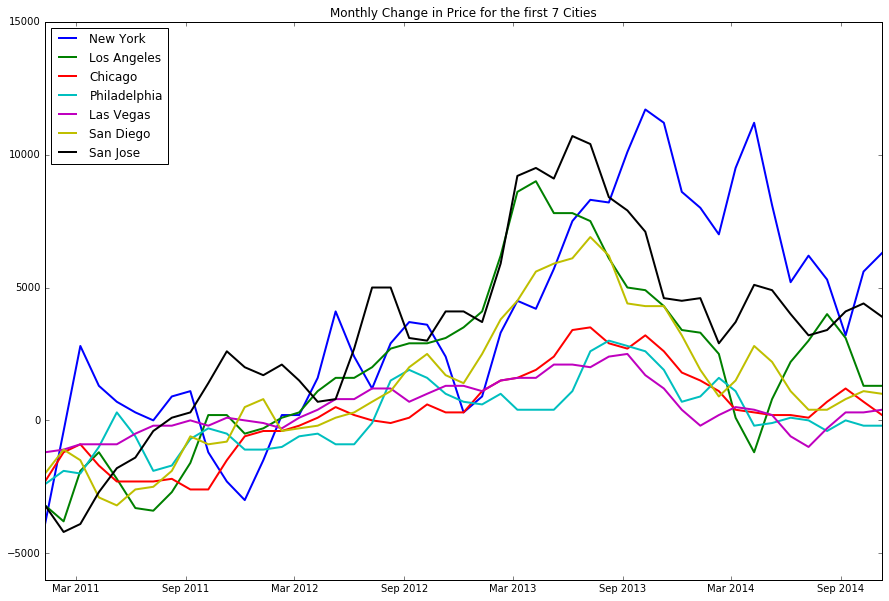

In [63]:
plot_first(7)

From the graph it is easy to see that the apartment prices kept increasing for all seven cities, with New York, Los Angeles and San Jose seeing the steepest increases. Prices fell everywhere after that, but shows signs of rebounding in New York and Los Angeles. 

Next we define a function to calculate the fractional increase over an year for the last three years, the year when it happens, and the avarage price for that year.

In [64]:
def get_max():
    columns = df.columns[181:]
    years = []
    
    for x in columns:
        years.append(x.split('-')[0])
    years = np.array(years)
    year_max = []
    maxes = []
    avgs = []
    for i in df.index:
        y = df[df.index==i][columns].values.reshape(len(columns))
        yly_ptg_inc = []
        yly_mean = []
        for year in set(years):
            year_avg = (y[years==year].max() - y[years==year].min())/\
                                                float(y[years==year][0])
            yly_ptg_inc.append(year_avg)
            yly_mean.append(np.mean(y[years==year]))
        
        idx = np.argmax(yly_ptg_inc)
        year_max.append(idx + 2011)
        maxes.append(np.max(year_avg))
        avgs.append(yly_mean[idx]) 
    return np.array(year_max), np.array(maxes), np.array(avgs)

We create a new array and add these values as columns.

In [65]:
new_df = df[['State', 'Metro']]
new_df['Year of Maximum Increase'] = year
new_df['Avg Price'] = avgs
new_df['Maximum Increase'] = maxes

/media/ubuntu/6E16B89E16B8692B/miniconda2/envs/wipro/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/media/ubuntu/6E16B89E16B8692B/miniconda2/envs/wipro/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/media/ubuntu/6E16B89E16B8692B/miniconda2/envs/wipro/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [66]:
new_df.head()

,State,Metro,Year of Maximum Increase,Avg Price,Maximum Increase
0,NY,New York,2015,664841.666667,0.037245
1,CA,Los Angeles,2015,321433.333333,0.085156
2,IL,Chicago,2015,173358.333333,0.012666
3,PA,Philadelphia,2015,248966.666667,0.028069
4,NV,Las Vegas,2015,70625.000000,0.172549


Finally, we plot ours results for the first twenty cities in the list, where the color of tha ball denotes the year of increase and the size of the ball denotes the avarage price for that year.

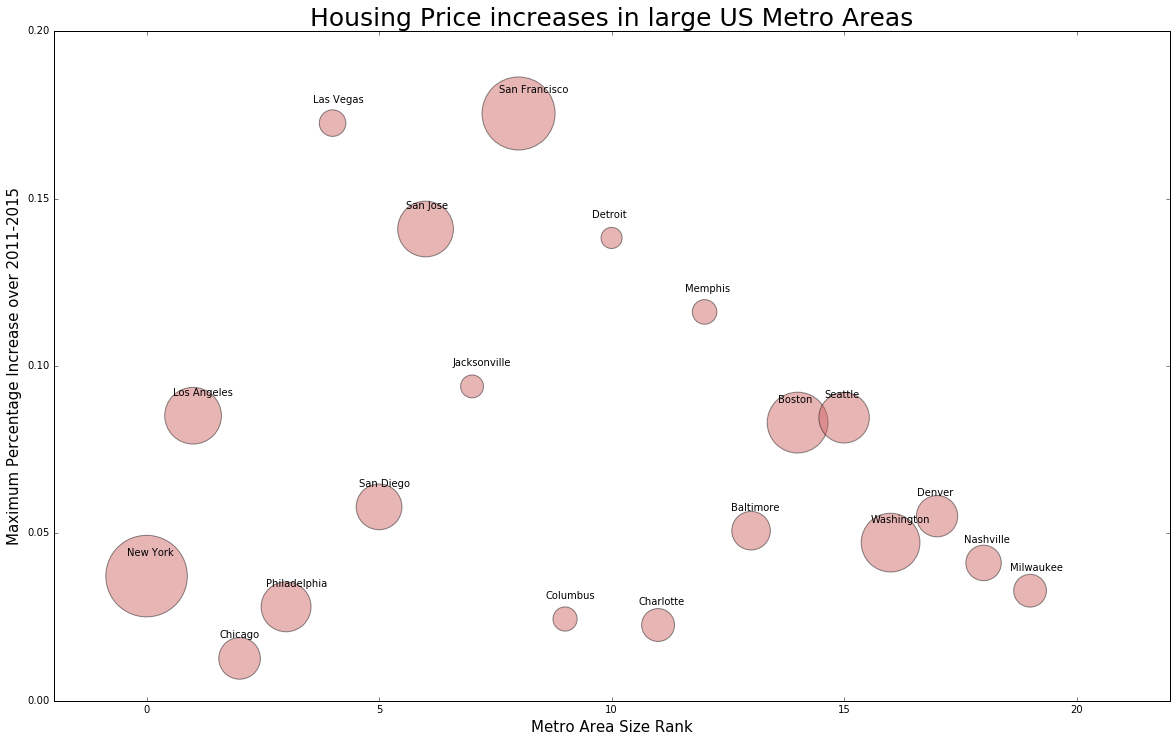

In [76]:
from matplotlib import colors
fig = plt.figure(figsize=(20,12))
big = new_df.dropna().iloc[:20]
color = colors.cnames.keys()
for i, year in enumerate([2011, 2012, 2013, 2014, 2015]):
    mask = big['Year of Maximum Increase'] == year
    plt.scatter(big[mask].index, big[mask]['Maximum Increase'], c=color[i],
                alpha=0.45, s=big[mask]['Avg Price']/100, label=str(year))


for city, x, y in zip(big['Metro'], big.index, big['Maximum Increase']):                                                
    plt.annotate(city, xy=(x,y), xytext=(-20, 20), textcoords='offset points')


plt.xlabel('Metro Area Size Rank', fontsize=15)
plt.ylabel('Maximum Percentage Increase over 2011-2015', fontsize=15)
plt.title('Housing Price increases in large US Metro Areas', fontsize=25)
plt.xlim(-2, 22)

#plt.legend('2011', '2012', '2013', '2014', '2015')
plt.show()

In [70]:
# Sorting of cities according to avarage price 
big.sort_values(by='Avg Price', ascending=False)

,State,Metro,Year of Maximum Increase,Avg Price,Maximum Increase
0,NY,New York,2015,664841.666667,0.037245
8,CA,San Francisco,2015,533750.000000,0.175424
14,MA,Boston,2015,369750.000000,0.083095
16,DC,Washington,2015,344933.333333,0.047247
1,CA,Los Angeles,2015,321433.333333,0.085156
6,CA,San Jose,2015,310358.333333,0.140913
15,WA,Seattle,2015,255183.333333,0.084540
3,PA,Philadelphia,2015,248966.666667,0.028069
5,CA,San Diego,2015,209083.333333,0.057920
2,IL,Chicago,2015,173358.333333,0.012666


In [73]:
color.keys()

[u'indigo',
 u'gold',
 u'hotpink',
 u'firebrick',
 u'indianred',
 u'sage',
 u'yellow',
 u'mistyrose',
 u'darkolivegreen',
 u'olive',
 u'darkseagreen',
 u'pink',
 u'tomato',
 u'lightcoral',
 u'orangered',
 u'navajowhite',
 u'lime',
 u'palegreen',
 u'darkslategrey',
 u'greenyellow',
 u'burlywood',
 u'seashell',
 u'mediumspringgreen',
 u'fuchsia',
 u'papayawhip',
 u'blanchedalmond',
 u'chartreuse',
 u'dimgray',
 u'black',
 u'peachpuff',
 u'springgreen',
 u'aquamarine',
 u'white',
 u'orange',
 u'lightsalmon',
 u'darkslategray',
 u'brown',
 u'ivory',
 u'dodgerblue',
 u'peru',
 u'darkgrey',
 u'lawngreen',
 u'chocolate',
 u'crimson',
 u'forestgreen',
 u'slateblue',
 u'lightseagreen',
 u'cyan',
 u'mintcream',
 u'silver',
 u'antiquewhite',
 u'mediumorchid',
 u'skyblue',
 u'gray',
 u'darkturquoise',
 u'goldenrod',
 u'darkgreen',
 u'floralwhite',
 u'darkviolet',
 u'darkgray',
 u'moccasin',
 u'saddlebrown',
 u'grey',
 u'darkslateblue',
 u'lightskyblue',
 u'lightpink',
 u'mediumvioletred',
 u'slate